In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

### **Ejercicios de Análisis de Datos Biosanitarios**

### 1. Análisis de Datos Tabulares

### Ejercicio 1.1: Perfil Epidemiológico de Enfermedades Cardiovasculares

Descripción: Analizar un conjunto de datos de pacientes para identificar 
factores de riesgo y patrones relacionados con enfermedades cardiovasculares. 

### Instrucciones: 

### 1. Cargar un conjunto de datos de historias clínicas con las siguientes variables:
- Edad 
- Género 
- Nivel de colesterol 
- Presión arterial 
- Índice de masa corporal (IMC) 
- Historial de diabetes 
- Incidencia de enfermedad cardiovascular

In [3]:
# Generacion de datos sinteticos
def generar_datos_cardiovasculares(n_muestras=1000):
    np.random.seed(42)
    
    # Generación de variables
    edad = np.random.normal(55, 15, n_muestras)
    genero = np.random.choice(['Masculino', 'Femenino'], n_muestras)
    colesterol = np.random.normal(200, 40, n_muestras)
    presión_arterial = np.random.normal(130, 20, n_muestras)
    imc = np.random.normal(27, 5, n_muestras)
    diabetes = np.random.choice([0,1], n_muestras, p=[0.7, 0.3])
    
    # Cálculo de riesgo cardiovascular
    riesgo = (
        (edad > 50) * 0.3 +
        (genero == 'Masculino') * 0.2 +
        (colesterol > 240) * 0.25 +
        (presión_arterial > 140) * 0.2 +
        (imc > 30) * 0.15 +
        (diabetes == 1) * 0.3
        )
    
    # COnvertir el DataFrame
    df = pd.DataFrame ({
        'Edad': edad,
        'Género': genero,
        'Colesterol': colesterol,
        'Presión arterial': presión_arterial,
        'IMC': imc,
        'Diabetes': diabetes,
        'Riesgo Cardiovascular': riesgo
        })

    return df

datos_cv = generar_datos_cardiovasculares()

### 2. Realizar las siguientes tareas de análisis: 
- Calcular estadísticas descriptivas 
- Identificar correlaciones entre variables 
- Segmentar la población por grupos de riesgo 
- Crear visualizaciones para comparar factores 

Estadísticas descriptivas
              Edad   Colesterol  Presión arterial          IMC     Diabetes  \
count  1000.000000  1000.000000       1000.000000  1000.000000  1000.000000   
mean     55.289981   201.189340        130.073522    26.769855     0.304000   
std      14.688239    39.362703         20.131601     5.060626     0.460213   
min       6.380990    79.219514         70.177281    11.961838     0.000000   
25%      45.286145   175.148078        115.795433    23.424893     0.000000   
50%      55.379509   200.670756        130.070712    26.798203     0.000000   
75%      64.719158   227.370264        143.647426    29.927253     1.000000   
max     112.790972   327.724303        208.524754    43.215465     1.000000   

       Riesgo Cardiovascular  
count            1000.000000  
mean                0.516950  
std                 0.265473  
min                 0.000000  
25%                 0.300000  
50%                 0.500000  
75%                 0.700000  
max           

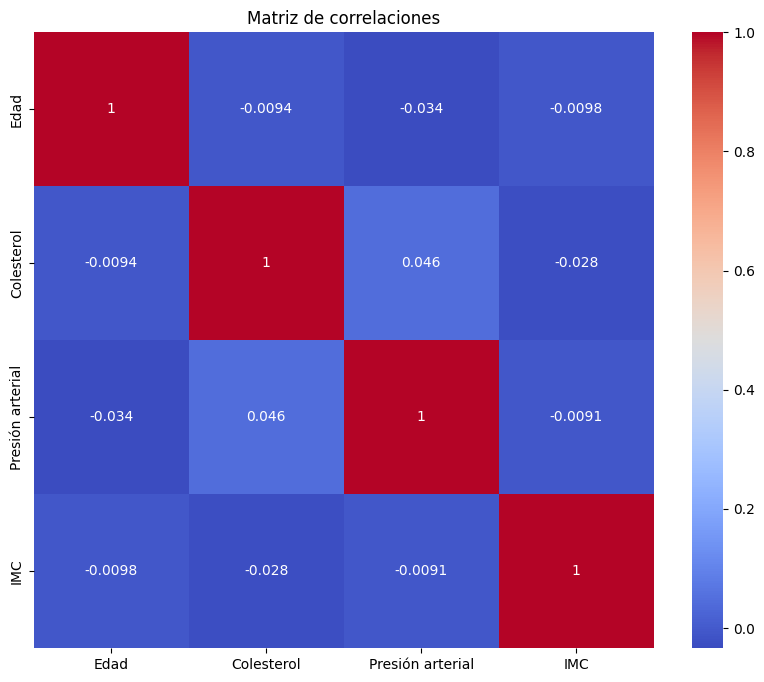

c:\Users\Javier\anaconda3\envs\python\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Javier\anaconda3\envs\python\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Javier\anaconda3\envs\python\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Javier\anaconda3\envs\python\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Javier\anaconda3\envs\python\Lib\subprocess.py", line

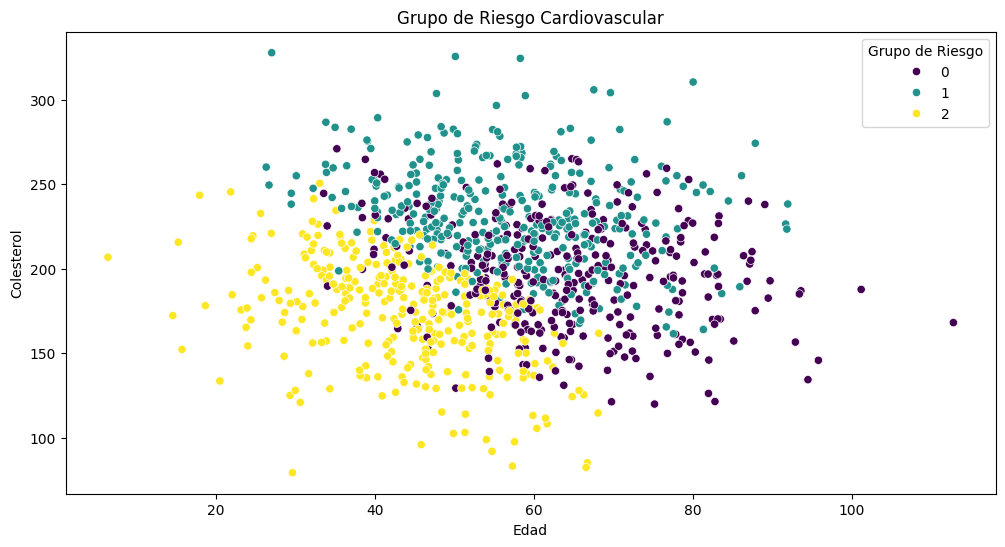


Riesgo Cardiovascular por Género
Género
Femenino     0.422309
Masculino    0.615849
Name: Riesgo Cardiovascular, dtype: float64

Prueba t de diferencia de riesgo por género
Estadístico t: 12.370105908331261
Valor p: 8.385412618424573e-33


In [4]:
def analisis_perfil_cardiovascular(df):
    # Estadísticas descriptivas
    print('Estadísticas descriptivas')
    print(df.describe())
    
    # Correlaciónes
    correlaciones = df[['Edad', 'Colesterol', 'Presión arterial', 'IMC']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
    plt.title('Matriz de correlaciones')
    plt.show()
    

    # Segmentar los grupos de riesgo
    features = ['Edad', 'Colesterol', 'Presión arterial', 'IMC']
    scaler = StandardScaler()
    datos_escalados = scaler.fit_transform(df[features])
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Grupo de Riesgo'] = kmeans.fit_predict(datos_escalados)


    # Visualización de grupos de riesgo
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Edad', y='Colesterol', hue='Grupo de Riesgo', palette='viridis')
    plt.title('Grupo de Riesgo Cardiovascular')
    plt.show()
                
    # Analisis de riesgo de género
    riesgo_por_genero = df.groupby('Género')['Riesgo Cardiovascular'].mean()
    print('\nRiesgo Cardiovascular por Género')
    print(riesgo_por_genero)
    
    
    # Prueba Estadística de diferencias de riesgo por género
    riesgo_masculino = df[df['Género'] == 'Masculino']['Riesgo Cardiovascular']
    riesgo_femenino = df[df['Género'] == 'Femenino']['Riesgo Cardiovascular']
    
    t_statistic, p_value = stats.ttest_ind(riesgo_masculino, riesgo_femenino)
    print(f'\nPrueba t de diferencia de riesgo por género')
    print(f'Estadístico t: {t_statistic}')
    print(f'Valor p: {p_value}')
    
    
                                        
# Ejecutar analisis 
analisis_perfil_cardiovascular(datos_cv)

### Ejercicio 1.2: Análisis de Ensayo Clínico de Nuevo Medicamento 

Descripción: Evaluar la eficacia de un nuevo tratamiento comparando grupos de 
intervención y control.

Instrucciones: 

1. Importar datos de un ensayo clínico con columnas: 
- ID de paciente 
- Grupo (intervención/control) 
- Dosis del medicamento 
- Marcadores biológicos 
- Efectos secundarios 
- Tiempo de recuperación 

In [4]:
'''# Generación de datos sintéticos
def generar_datos_ensayo_clinico(n_muestras=500):
    np.random.seed(42)
    # Variables
    grupo = np.random.choice(['Intervencion', 'Control'], n_muestras)
    dosis = np.where(grupo == 'Intervencion',
                     np.random.uniform(50, 200, n_muestras),
                     np.zeros(n_muestras))
    # Marcadores biológicos simulados
    marcador_base = np.random.normal(100, 20, n_muestras)
    marcador_final = np.where(
        grupo == 'Intervencion',
        marcador_base * (1 - np.random.uniform(0.1, 0.3, n_muestras)),
        marcador_base
    )
    # Efectos secundarios
    efectos_secundarios = np.where(grupo == 'Intervencion', 0.2, 0.05)
    efectos_secundarios = np.random.binomial(1, efectos_secundarios)
    tiempo_recuperacion = np.where(
        grupo == 'Intervencion',
        np.random.normal(14, 3, n_muestras),
        np.random.normal(21, 3, n_muestras)
    )
    
    df = pd.DataFrame({
        'ID': range(1, n_muestras + 1),
        'Grupo': grupo,
        'Dosis': dosis,
        'Marcador_inicial': marcador_base,
        'Marcador_final': marcador_final,
        'Efectos_secundarios': efectos_secundarios,
        'Tiempo_recuperacion': tiempo_recuperacion
    })
    return df
# Generar los datos
datos_ensayo = generar_datos_ensayo_clinico()
# Análisis ensayo
def analisis_ensayo_clinico(df):
    # Análisis comparativo de grupos
    comparacion_grupos = df.groupby('Grupo').agg({
        'Marcador_inicial': 'mean',
        'Marcador_final': 'mean',
        'Efectos_secundarios': 'mean',
        'Tiempo_recuperacion': 'mean'
    })
    print('Comparación de grupos:\n', comparacion_grupos)

    # Prueba de significancia (t-test) entre los marcadores de ambos grupos
    grupo_intervencion = df[df['Grupo'] == 'Intervencion']['Marcador_final']
    grupo_control = df[df['Grupo'] == 'Control']['Marcador_final']
    
    t_statistic, p_value = stats.ttest_ind(grupo_intervencion, grupo_control, equal_var=False)
    print(f'\nPrueba t para Marcadores:\nEstadístico t: {t_statistic}\nValor p: {p_value:4f}')
    
    # Promedio de efetos secundarios por rango de dosis en grupos de intervención
    efectos_por_dosis = (df[df['Grupo'] == 'Intervencion']
                         .groupby(pd.cut(df[df['Grupo'] == 'Intervencion']['Dosis'], bins=4))
                         ['Efectos_secundarios'].mean())
    print('\nEfectos secundarios por dosis en grupo de intervención:\n', efectos_por_dosis)


    # Visualización de resultados
    plt.figure(figsize=(8, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Grupo', y='Marcador_final', data=df)
    plt.title('Marcador Final por Grupos')

    # Scatterplot de dosis vs tiempo de recuperación en el grupo de intervención
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='Dosis', y='Tiempo_recuperacion', hue= 'Efectos_secundarios', data=df[df['Grupo'] == 'Intervencion'])
    plt.title('Dosis vs Tiempo de Recuperación')
    
    plt.tight_layout()
    plt.show()

    # Analisis de regresión Lineal: Relación entre dosis y marcador final
    x = df[df['Grupo'] == 'Intervencion'] [['Dosis']]
    y_marcador = df[df['Grupo'] == 'Intervencion']['Marcador_final']
    
    modelo = LinearRegression().fit(x, y_marcador)
    print(f'\nModelo de Regresión - Dosis vs Marcador:\nPendiente: {modelo.coef_[0]:4f}\nIntercepto: {modelo.intercept_:4f}')
    
    

# Ejecutar análisis
analisis_ensayo_clinico(datos_ensayo)'''

"# Generación de datos sintéticos\ndef generar_datos_ensayo_clinico(n_muestras=500):\n    np.random.seed(42)\n    # Variables\n    grupo = np.random.choice(['Intervencion', 'Control'], n_muestras)\n    dosis = np.where(grupo == 'Intervencion',\n                     np.random.uniform(50, 200, n_muestras),\n                     np.zeros(n_muestras))\n    # Marcadores biológicos simulados\n    marcador_base = np.random.normal(100, 20, n_muestras)\n    marcador_final = np.where(\n        grupo == 'Intervencion',\n        marcador_base * (1 - np.random.uniform(0.1, 0.3, n_muestras)),\n        marcador_base\n    )\n    # Efectos secundarios\n    efectos_secundarios = np.where(grupo == 'Intervencion', 0.2, 0.05)\n    efectos_secundarios = np.random.binomial(1, efectos_secundarios)\n    tiempo_recuperacion = np.where(\n        grupo == 'Intervencion',\n        np.random.normal(14, 3, n_muestras),\n        np.random.normal(21, 3, n_muestras)\n    )\n    \n    df = pd.DataFrame({\n        'ID': 

2. Tareas a realizar: 
- Realizar pruebas estadísticas de significancia 
- Calcular tasas de respuesta al tratamiento 
- Analizar distribución de efectos secundarios 
- Crear intervalos de confianza para los resultados 

### Ejercicio 1.3: Estudio Nutricional Longitudinal

**Descripción**: Analizar cambios en parámetros nutricionales de un grupo de 
pacientes.

**Instrucciones**:

1. Cargar datos con información: 
- Nombre del participante 
- Edad 
- Peso 
- Índice de masa corporal 
- Consumo calórico 
- Niveles de micronutrientes 
- Actividad física

2. Desarrollar análisis: 
- Identificar tendencias de cambio 
- Calcular promedios y desviaciones estándar 
- Realizar agrupaciones por características demográficas 
- Generar informes de progresión individual 

### Ejercicio 1.4: Base de Datos Genómica 

**Descripción**: Analizar variantes genéticas asociadas a una condición médica 
específica. 

**Instrucciones**: 

1. Manejar conjunto de datos genómicos con: 
- ID de muestra 
- Marcadores genéticos 
- Presencia/ausencia de mutación 
- Información clínica asociada 
- Resultado de condición médica 

2. Tareas de análisis: 
- Identificar frecuencia de variantes 
- Realizar análisis de asociación genética 
- Crear visualizaciones de distribución genética 
- Calcular riesgos relativos 

### Ejercicio 1.5: Registro de Eventos Hospitalarios

**Descripción**: Analizar eficiencia y patrones en un registro de eventos 
hospitalarios.

**Instrucciones**:

1. Trabajar con datos de: 
- Número de ingreso 
- Fecha de admisión/alta 
- Especialidad médica 
- Duración de estancia 
- Diagnóstico principal 
- Procedimientos realizados

In [5]:
'''def generar_datos_hospitalarios(n_eventos=1000):
    np.random.seed(42)
    
    # Especialidades médicas
    especialidades = [
        'Cardiologia', 'Nuerologia', 'Oncologia',
        'Traumatologia', 'Medicina Interna', 'Pediatria'
    ]
    
    diagnostico = [
        'Infarto', 'Ictus', 'Tumor', 'Fractura',
        'Neumonia', 'Diabetes', 'Hipertension'
    ]
    
    # Generación de datos
    datos = []
    fecha_base = pd.Timestamp('2025-01-01')
    
    for i in range(n_eventos):
        # Fecha de admisión y alta
        duracion = np.random.randint(1, 15)
        fecha_admision = fecha_base + pd.Timedelta(days=np.random.randint(0, 365))
        fecha_alta = fecha_admision + pd.Timedelta(days=duracion)
        
        datos.append({
            'NumIngreso': f'HOSP_{i+1}',
            'FechaAdmision': fecha_admision,
            'FechaAlta': fecha_alta,
            'Especialidad': np.random.choice(especialidades),
            'Diagnostico': np.random.choice(diagnostico),
            'DuracionEstancia': duracion,
            'Procedimiento': np.random.randint(1,5)
            })
        
    return pd.DataFrame(datos)
    
    # Generar los datos hospitalarios
datos_hospitalarios = generar_datos_hospitalarios()

# Mostrar los primeros registros
datos_hospitalarios.head()'''

"def generar_datos_hospitalarios(n_eventos=1000):\n    np.random.seed(42)\n    \n    # Especialidades médicas\n    especialidades = [\n        'Cardiologia', 'Nuerologia', 'Oncologia',\n        'Traumatologia', 'Medicina Interna', 'Pediatria'\n    ]\n    \n    diagnostico = [\n        'Infarto', 'Ictus', 'Tumor', 'Fractura',\n        'Neumonia', 'Diabetes', 'Hipertension'\n    ]\n    \n    # Generación de datos\n    datos = []\n    fecha_base = pd.Timestamp('2025-01-01')\n    \n    for i in range(n_eventos):\n        # Fecha de admisión y alta\n        duracion = np.random.randint(1, 15)\n        fecha_admision = fecha_base + pd.Timedelta(days=np.random.randint(0, 365))\n        fecha_alta = fecha_admision + pd.Timedelta(days=duracion)\n        \n        datos.append({\n            'NumIngreso': f'HOSP_{i+1}',\n            'FechaAdmision': fecha_admision,\n            'FechaAlta': fecha_alta,\n            'Especialidad': np.random.choice(especialidades),\n            'Diagnostico': np.

2. Realizar análisis: 
- Calcular tiempos de estancia promedio 
- Identificar especialidades con mayor carga 
- Analizar distribución de diagnósticos 
- Crear indicadores de eficiencia hospitalaria 


In [6]:
'''def analisis_eventos_hospitalarios(df):
    
    # Estadisticas de estancia
    estancia_por_especialidad = df.groupby('Especialidad')['DuracionEstancia'].agg(['mean', 'median', 'max', 'count']).sort_values('count', ascending=False)
    print('Estadísticas de Estancia por Especialidad\n', estancia_por_especialidad)
    
       
    # Visualizar carga por especialidades
    plt.figure(figsize=(12, 6))
    df['Especialidad'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Volumen de eventos por Especialidad')
    plt.xlabel('Especialidad')
    plt.ylabel('Número de Eventos')
    plt.xticks(rotation=45)
    
    plt.show()
    
    # Distribución por diagnóstico
    distribucion_diagnostico = df['Diagnostico'].value_counts(normalize=True)
    print('\nDistribución de Diagnósticos\n', distribucion_diagnostico)


    # Analisis temporal para tiempo estancia
    df['Mes'] = df['FechaAdmision'].dt.to_period('M')
    eventos_mensuales = df.groupby('Mes').size()
    
    
    plt.figure(figsize=(12, 6))
    eventos_mensuales.plot(kind='line', color='red')
    plt.title('Eventos hospitalarios mensuales')
    plt.xlabel('Mes')
    plt.ylabel('Número de eventos')
    plt.show()
    
    
    # Indicadores de efiencia
    #Correlación entre el procedimiento y duración de la estancia
    correlacion = df['Procedimiento'].corr(df['DuracionEstancia'])
    print('\nCorrelación entre Procedimiento - Duración de Estancia')
    print(f'Coeficiente de Correlación: {correlacion}')

    # Prueba estadística de varianza
    grupos_especialidad = [
        grupo['DuracionEstancia']
        for nombre, grupo in df.groupby('Especialidad')
    ]
    f_statistic, p_value = stats.f_oneway(*grupos_especialidad)
    print('\nAnalisis de varianza duración de estancia')
    print(f'F-statistic: {f_statistic}\nP-Value: {p_value}')
    
    
# Ejecutar el analisis
analisis_eventos_hospitalarios(datos_hospitalarios)'''

"def analisis_eventos_hospitalarios(df):\n    \n    # Estadisticas de estancia\n    estancia_por_especialidad = df.groupby('Especialidad')['DuracionEstancia'].agg(['mean', 'median', 'max', 'count']).sort_values('count', ascending=False)\n    print('Estadísticas de Estancia por Especialidad\n', estancia_por_especialidad)\n    \n       \n    # Visualizar carga por especialidades\n    plt.figure(figsize=(12, 6))\n    df['Especialidad'].value_counts().plot(kind='bar', color='skyblue')\n    plt.title('Volumen de eventos por Especialidad')\n    plt.xlabel('Especialidad')\n    plt.ylabel('Número de Eventos')\n    plt.xticks(rotation=45)\n    \n    plt.show()\n    \n    # Distribución por diagnóstico\n    distribucion_diagnostico = df['Diagnostico'].value_counts(normalize=True)\n    print('\nDistribución de Diagnósticos\n', distribucion_diagnostico)\n\n\n    # Analisis temporal para tiempo estancia\n    df['Mes'] = df['FechaAdmision'].dt.to_period('M')\n    eventos_mensuales = df.groupby('Mes'

### 2. Análisis de Grafos

### Ejercicio 2.1: Red de Transmisión Epidemiológica

Descripción: Modelar y analizar la propagación de una enfermedad infecciosa. 

Instrucciones: 

1. Construir grafo de transmisión con: 
- Nodos: Individuos 
- Aristas: Contactos/Transmisión 
- Atributos: Edad, estado de salud, localización 

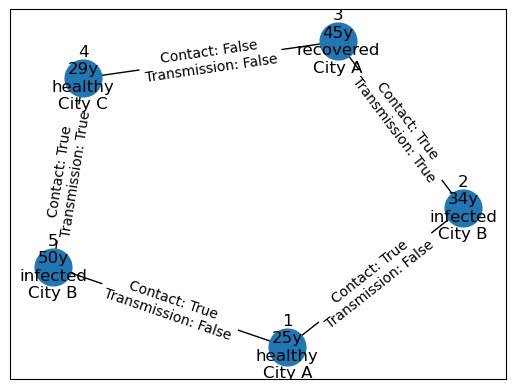

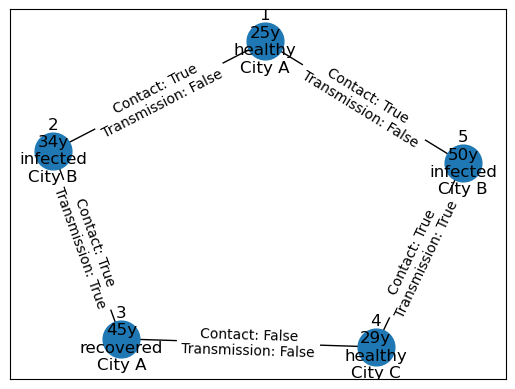

Node Degrees: {1: 2, 2: 2, 3: 2, 4: 2, 5: 2}
Connected Components: [{1, 2, 3, 4, 5}]
Largest Connected Component: {1, 2, 3, 4, 5}
Clustering Coefficients: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
Average Clustering Coefficient: 0.0
Shortest Path Lengths: {1: {1: 0, 2: 1, 5: 1, 3: 2, 4: 2}, 2: {2: 0, 1: 1, 3: 1, 5: 2, 4: 2}, 3: {3: 0, 2: 1, 4: 1, 1: 2, 5: 2}, 4: {4: 0, 3: 1, 5: 1, 2: 2, 1: 2}, 5: {5: 0, 4: 1, 1: 1, 3: 2, 2: 2}}
Diameter of the Graph: 2


In [7]:
# Create a graph object
G = nx.Graph()

# Define node attributes: age, health status, location
nodes = [
    (1, {"age": 25, "health_status": "healthy", "location": "City A"}),
    (2, {"age": 34, "health_status": "infected", "location": "City B"}),
    (3, {"age": 45, "health_status": "recovered", "location": "City A"}),
    (4, {"age": 29, "health_status": "healthy", "location": "City C"}),
    (5, {"age": 50, "health_status": "infected", "location": "City B"})
]

# Add nodes to the graph
G.add_nodes_from(nodes)

# Define edges with attributes: contact/transmission
edges = [
    (1, 2, {"contact": True, "transmission": False}),
    (2, 3, {"contact": True, "transmission": True}),
    (3, 4, {"contact": False, "transmission": False}),
    (4, 5, {"contact": True, "transmission": True}),
    (1, 5, {"contact": True, "transmission": False})
]

# Add edges to the graph
G.add_edges_from(edges)

# Display the graph with node and edge attributes
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, labels={node: f"{node}\n{G.nodes[node]['age']}y\n{G.nodes[node]['health_status']}\n{G.nodes[node]['location']}" for node in G.nodes})

# Draw edges with labels
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"Contact: {G[u][v]['contact']}\nTransmission: {G[u][v]['transmission']}" for u, v in G.edges})

# Show plot
plt.show()

# Visualize Transmission Graph

# Display the graph with node and edge attributes
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, labels={node: f"{node}\n{G.nodes[node]['age']}y\n{G.nodes[node]['health_status']}\n{G.nodes[node]['location']}" for node in G.nodes})

# Draw edges with labels
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"Contact: {G[u][v]['contact']}\nTransmission: {G[u][v]['transmission']}" for u, v in G.edges})

# Show plot
plt.show()


# Analyze Graph Properties

# Calculate the degree of each node
node_degrees = dict(G.degree())
print("Node Degrees:", node_degrees)

# Calculate the number of connected components
connected_components = list(nx.connected_components(G))
print("Connected Components:", connected_components)

# Calculate the largest connected component
largest_component = max(connected_components, key=len)
print("Largest Connected Component:", largest_component)

# Calculate the clustering coefficient for each node
clustering_coefficients = nx.clustering(G)
print("Clustering Coefficients:", clustering_coefficients)

# Calculate the average clustering coefficient
average_clustering_coefficient = nx.average_clustering(G)
print("Average Clustering Coefficient:", average_clustering_coefficient)

# Calculate the shortest path lengths between all pairs of nodes
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
print("Shortest Path Lengths:", shortest_path_lengths)

# Calculate the diameter of the graph (longest shortest path in the largest component)
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Diameter of the Graph:", diameter)
    

2. Tareas de análisis: 
- Calcular centralidad de nodos 
- Identificar "superspreaders" 
- Simular patrones de propagación 
- Visualizar estructura de red 

Betweenness Centrality: {1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666}
Closeness Centrality: {1: 0.6666666666666666, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.6666666666666666}
Eigenvector Centrality: {1: 0.4472135954999579, 2: 0.4472135954999579, 3: 0.4472135954999579, 4: 0.4472135954999579, 5: 0.4472135954999579}
Superspreaders: [1, 2, 3]
Infected Nodes after simulation: {2}


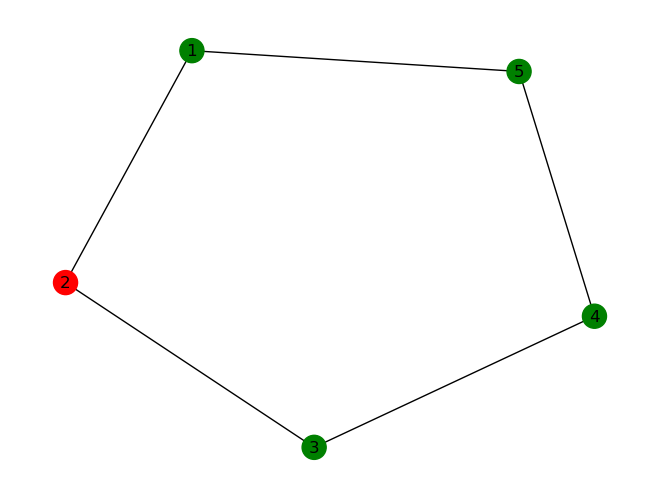

In [8]:
# Calcular centralidad de nodos
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:", betweenness_centrality)

closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:", closeness_centrality)

eigenvector_centrality = nx.eigenvector_centrality(G)
print("Eigenvector Centrality:", eigenvector_centrality)

# Identificar "superspreaders" (nodos con alta centralidad)
superspreaders = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:3]
print("Superspreaders:", superspreaders)

# Simular patrones de propagación
import random

def simulate_spread(G, initial_infected, steps):
    infected = set(initial_infected)
    for _ in range(steps):
        new_infected = set()
        for node in infected:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in infected and random.random() < 0.1:  # Probabilidad de transmisión
                    new_infected.add(neighbor)
        infected.update(new_infected)
    return infected

initial_infected = [2]  # Nodo inicial infectado
steps = 5
infected_nodes = simulate_spread(G, initial_infected, steps)
print("Infected Nodes after simulation:", infected_nodes)

# Visualizar estructura de red con nodos infectados
node_colors = ['red' if node in infected_nodes else 'green' for node in G.nodes]
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_colors, with_labels=True)
plt.show()

### Ejercicio 2.2: Interacciones Proteicas 

Descripción: Analizar red de interacciones proteicas en una vía metabólica. 

Instrucciones: 

1. Crear grafo de interacciones con: 
- Nodos: Proteínas 
- Aristas: Interacciones/Modificaciones 
- Atributos: Función biológica 

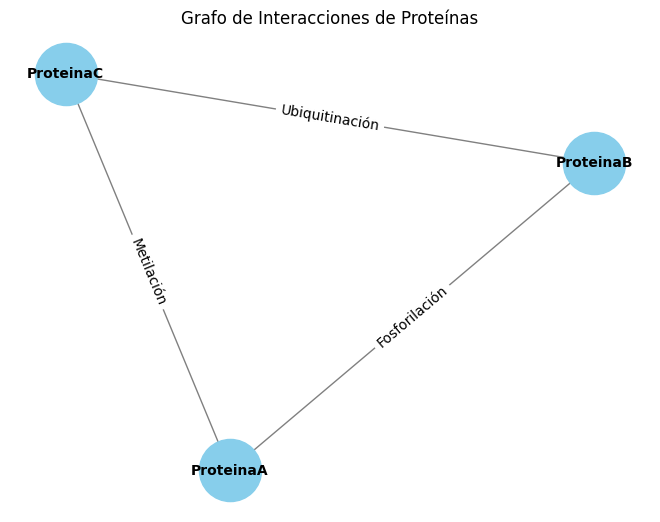

In [2]:
# Crear un grafo vacío
G = nx.Graph()

# Añadir nodos con atributos
G.add_node('ProteinaA', funcion_biologica='Transporte')
G.add_node('ProteinaB', funcion_biologica='Señalización')
G.add_node('ProteinaC', funcion_biologica='Metabolismo')

# Añadir aristas (interacciones/modificaciones)
G.add_edge('ProteinaA', 'ProteinaB', tipo_interaccion='Fosforilación')
G.add_edge('ProteinaB', 'ProteinaC', tipo_interaccion='Ubiquitinación')
G.add_edge('ProteinaA', 'ProteinaC', tipo_interaccion='Metilación')

# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight='bold', edge_color='gray')

# Añadir etiquetas de atributos
labels = nx.get_edge_attributes(G, 'tipo_interaccion')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Mostrar el grafo
plt.title('Grafo de Interacciones de Proteínas')
plt.show()

2. Desarrollar análisis: 
- Identificar proteínas clave 
- Calcular grados de conectividad 
- Analizar comunidades de proteínas 
- Visualizar estructura de red

### Ejercicio 2.3: Red de Colaboración Científica 

Descripción: Estudiar colaboraciones en investigación biomédica. 

Instrucciones:

1. Construir grafo de: 
- Nodos: Investigadores 
- Aristas: Publicaciones conjuntas 
- Atributos: Especialidad, institución 

2. Realizar análisis: 
- Calcular índices de centralidad 
- Identificar investigadores clave 
- Analizar comunidades de investigación 
- Visualizar estructura de colaboración 

### Ejercicio 2.4: Red de Referencia Hospitalaria 

Descripción: Modelar sistema de referencias entre centros de salud. 

Instrucciones:

1. Crear grafo de: 
- Nodos: Centros de salud 
- Aristas: Referencias/Derivaciones 
- Atributos: Especialidades, complejidad 

2. Tareas de análisis: 
- Identificar centros centrales 
- Calcular flujos de referencia 
- Analizar eficiencia del sistema 
- Visualizar estructura de red 


### Ejercicio 2.5: Red de Transmisión Genética

Descripción: Analizar árbol genealógico para estudios de herencia. 

Instrucciones:

1. Construir grafo de: 
- Nodos: Individuos 
- Aristas: Relaciones familiares 
- Atributos: Características genéticas

2. Desarrollar análisis: 
- Identificar patrones de herencia 
- Calcular probabilidades genéticas 
- Visualizar árbol genealógico 
- Analizar riesgos de transmisión

### 3. Análisis de Datos Textuales

Ejercicio 3.1: Análisis de Historias Clínicas

Descripción: Extraer información de registros médicos textuales.

Instrucciones: 

1. Recopilar conjunto de: 
- Informes médicos 
- Notas de evolución 
- Resúmenes de alta 

2. Realizar procesamiento: 
- Limpieza de texto 
- Extracción de entidades médicas 
- Análisis de sentimiento 
- Identificación de diagnósticos

### Ejercicio 3.2: Minería de Literatura Científica

Descripción: Analizar publicaciones biomédicas.

Instrucciones: 

1. Recopilar corpus de: 
- Artículos científicos 
- Resúmenes de investigación 
- Revisiones sistemáticas 

2. Desarrollar análisis: 
- Extracción de palabras clave 
- Identificación de temas 
- Análisis de co-ocurrencia 
- Visualización de tendencias

### Ejercicio 3.3: Análisis de Consentimientos Informados

Descripción: Procesar documentos de consentimiento. 

Instrucciones: 

1. Trabajar con: 
- Modelos de consentimiento 
- Variantes de documentos 
- Versiones en diferentes idiomas 

2. Realizar tareas: 
- Normalización de texto 
- Extracción de cláusulas 
- Análisis comparativo 
- Identificación de variaciones

### Ejercicio 3.4: Revisión de Reportes de Eventos Adversos

Descripción: Analizar reportes de farmacovigilancia.

Instrucciones:

1. Recopilar: 
- Reportes de efectos secundarios 
- Descripciones de incidentes 
- Información de pacientes 

2. Desarrollar análisis: 
- Clasificación de eventos 
- Extracción de síntomas 
- Identificación de patrones 
- Generación de alertas 

### Ejercicio 3.5: Análisis de Comunicaciones de Pacientes

Descripción: Procesar comunicaciones en plataformas de salud.

Instrucciones:

1. Trabajar con: 
- Mensajes de pacientes 
- Consultas en línea 
- Foros de salud

2. Realizar tareas: 
- Clasificación de consultas 
- Análisis de sentimiento 
- Detección de necesidades 
- Generación de insights 

### 4. Análisis de Series Temporales

Ejercicio 4.1: Monitoreo de Indicadores Epidemiológicos 

Descripción: Analizar evolución de enfermedades. 

Instrucciones: 

1. Recopilar datos de: 
- Casos confirmados 
- Hospitalizaciones 
- Recuperaciones 
- Fallecimientos 

2. Realizar análisis: 
- Descomposición de series 
- Predicción de tendencias 
- Detección de patrones estacionales 
- Modelado de escenarios 


### Ejercicio 4.2: Seguimiento de Parámetros Fisiológicos 

Descripción: Monitorear variables de pacientes.

Instrucciones:

1. Trabajar con: 
- Registros de presión arterial 
- Niveles de glucosa 
- Frecuencia cardíaca 
- Peso corporal 

2. Desarrollar análisis: 
- Identificación de tendencias 
- Detección de anomalías 
- Predicción de cambios 
- Generación de alertas 

### Ejercicio 4.3: Evolución de Tratamientos Farmacológicos

Descripción: Seguimiento de respuesta a medicamentos.

Instrucciones: 

1. Recopilar datos de: 
- Dosis administradas 
- Marcadores biológicos 
- Respuesta al tratamiento 
- Efectos secundarios 

2. Realizar tareas: 
- Análisis de progresión 
- Modelado de respuesta 
- Identificación de patrones 
- Optimización de tratamientos 

### Ejercicio 4.4: Estudio de Variabilidad Genética 

Descripción: Analizar cambios genéticos en el tiempo. 

Instrucciones: 


1. Trabajar con: 
- Secuencias genéticas 
- Mutaciones 
- Expresión génica 
- Marcadores evolutivos 

2. Desarrollar análisis: 
- Identificación de cambios 
- Modelado de evolución 
- Predicción de variantes 
- Estudio de trayectorias 

### Ejercicio 4.5: Registro de Parámetros Ambientales en Salud

Descripción: Monitorear impacto ambiental.

Instrucciones: 

1. Recopilar datos de: 
- Contaminación atmosférica 
- Temperatura 
- Humedad 
- Índices de enfermedades

2. Realizar tareas: 
- Correlación ambiente-salud 
- Predicción de impactos 
- Identificación de patrones 
- Modelado de escenarios

### 5. Análisis de Imágenes

Ejercicio 5.1: Diagnóstico por Imágenes Médicas

Descripción: Procesamiento de radiografías.

Instrucciones: 

1. Trabajar con: 
- Radiografías de tórax 
- Imágenes de resonancia 
- Tomografías 
- Marcadores de lesiones 

2. Realizar tareas: 
- Segmentación de imágenes 
- Detección de anomalías -
- Clasificación de lesiones 
- Cuantificación de hallazgos 

### Ejercicio 5.2: Análisis Histológico 

Descripción: Procesamiento de imágenes microscópicas. 

Instrucciones: 

1. Recopilar: 
- Preparaciones histológicas 
- Cortes celulares 
- Imágenes de tejidos 
- Marcadores tumorales

2. Desarrollar análisis: 
- Segmentación celular 
- Clasificación de estructuras 
- Cuantificación de células 
- Detección de patologías 

### Ejercicio 5.3: Seguimiento de Cicatrización

Descripción: Monitoreo de heridas.

Instrucciones: 

1. Trabajar con: 
- Fotografías de heridas 
- Imágenes secuenciales 
- Marcadores de evolución 
- Registros de curación

2. Realizar tareas: 
- Medición de área 
- Análisis de color 
- Detección de cambios 
- Predicción de cicatrización 

### Ejercicio 5.4: Análisis de Biomarcadores Visuales

Descripción: Procesamiento de imágenes de biomarcadores.

Instrucciones:

1. Recopilar: 
- Imágenes de marcadores 
- Tinciones específicas 
- Biomarcadores fluorescentes 
- Registros de expresión 

2. Desarrollar análisis: 
- Cuantificación de expresión 
- Segmentación de marcadores 
- Clasificación de patrones 
- Correlación con diagnósticos 

### Ejercicio 5.5: Análisis Genético por Imagen 

Descripción: Procesamiento de cariotipo.

Instrucciones:

1. Trabajar con: 
- Imágenes de cromosomas 
- Preparaciones de cariotipo 
- Marcadores cromosómicos 
- Registros genéticos 

2. Realizar tareas: 
- Identificación cromosómica 
- Detección de anomalías 
- Cuantificación de variantes 
- Análisis de estructuras 


### Próximos Pasos 

**Para cada ejercicio, se recomienda**:
   - Utilizar herramientas como Python (pandas, numpy, scikit-learn) 
   - Emplear librerías especializadas (scipy, matplotlib) 
   - Aplicar técnicas de machine learning 
   - Validar resultados con expertos del área 